In [8]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
urine_df = pd.read_csv("data/urine_test_data.csv")
urine_df

,Sample_ID,Organism_1,Organism_2,Organism_3,Organism_4,Organism_5,Organism_6,Organism_7,Organism_8,Organism_9,...,Antibiotic_13,Antibiotic_14,Antibiotic_15,Antibiotic_16,Antibiotic_17,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5
0,Sample_0001,675,291,0,204,666,0,0,0,799,...,S,S,R,S,S,0,0,0,0,0
1,Sample_0002,692,377,0,0,0,971,0,0,0,...,R,R,S,S,S,0,1,0,0,0
2,Sample_0003,0,173,0,0,0,25,0,0,0,...,S,R,S,S,S,0,0,0,0,0
3,Sample_0004,811,0,710,0,0,0,0,485,0,...,S,S,R,S,R,0,0,0,0,0
4,Sample_0005,708,553,0,0,0,0,0,0,0,...,S,S,R,S,S,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Sample_0996,57,0,0,670,0,0,0,0,0,...,S,S,R,S,S,0,0,0,0,0
996,Sample_0997,221,0,207,0,0,0,506,0,0,...,S,S,R,S,S,0,0,0,0,0
997,Sample_0998,0,0,0,0,0,0,0,0,0,...,S,S,R,R,S,0,0,0,0,0
998,Sample_0999,0,574,0,0,0,0,0,817,0,...,R,S,R,S,S,0,1,0,0,0


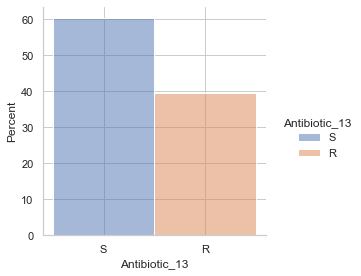

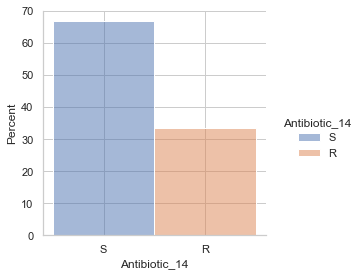

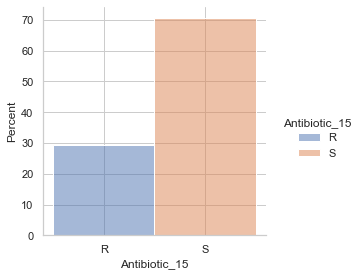

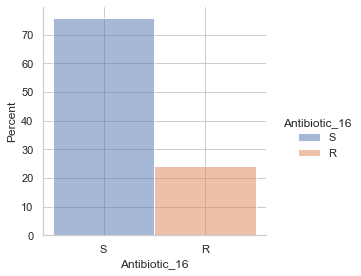

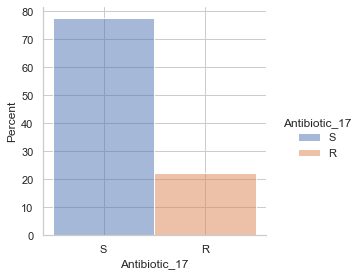

In [72]:
sns.displot(data=urine_df, x='Antibiotic_13', stat='percent', hue='Antibiotic_13', height=4)
sns.displot(data=urine_df, x='Antibiotic_14', stat='percent', hue='Antibiotic_14', height=4)
sns.displot(data=urine_df, x='Antibiotic_15', stat='percent', hue='Antibiotic_15', height=4)
sns.displot(data=urine_df, x='Antibiotic_16', stat='percent', hue='Antibiotic_16', height=4)
sns.displot(data=urine_df, x='Antibiotic_17', stat='percent', hue='Antibiotic_17', height=4)


<AxesSubplot:>

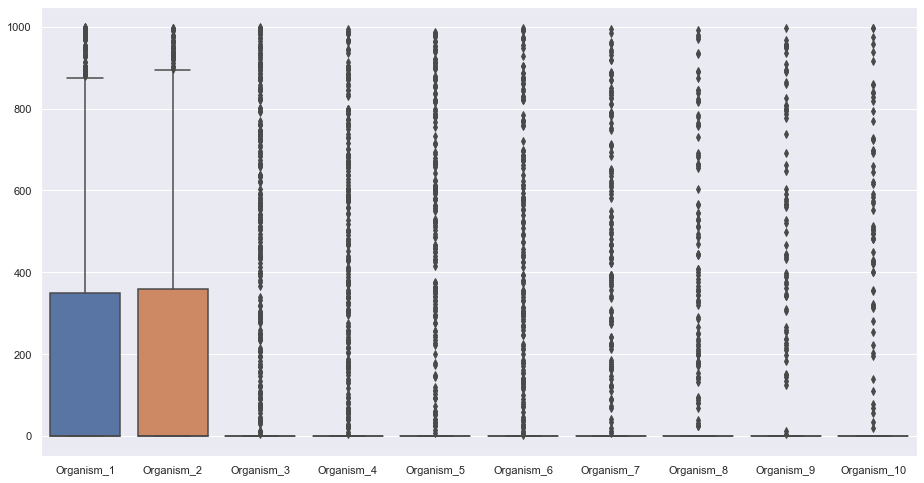

In [92]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
organisms_df = pd.DataFrame(data=urine_df , columns = ['Organism_1','Organism_2', 'Organism_3','Organism_4','Organism_5',
                                                       'Organism_6', 'Organism_7', 'Organism_8', 'Organism_9', 'Organism_10'])

sns.boxplot(data=organisms_df)
